In [146]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [147]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\project\University admission\cleaned_dataset_admission_predict.csv")

In [148]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [149]:
df.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# X and y

In [151]:
X = df.drop(columns = ['Chance_of_Admit'])
y = df['Chance_of_Admit']

# Train_Test_Split

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

# Modelling

In [153]:
# ALL EVALUATION IN ONE CELL

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


print('coefficient : ', model.coef_)
print('itercept : ', model.intercept_)
print("===========================")


# Prediction RMSE

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)


# EVALUATION

print("Train_RMSE : ", np.sqrt(mean_squared_error(y_train, ypred_train)))
print("cv_score_RMSE", np.sqrt(abs(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')).mean()))
print("Test_RMSE : ", np.sqrt(mean_squared_error(y_test, ypred_test)))


print("=================================================")


# Prediction R2

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

print("Train_R2 : ", r2_score(y_train, ypred_train))
print("CV_Score_R2", cross_val_score(model, X_train, y_train, cv = 5, scoring = 'r2').mean())
print("Test_R2 : ", r2_score(y_test, ypred_test))

coefficient :  [ 0.00191141  0.00324231  0.0058481  -0.00215774  0.01650554  0.11999854
  0.02533459]
itercept :  -1.343381554439646
Train_RMSE :  0.058798181480776
cv_score_RMSE 0.05983230066444604
Test_RMSE :  0.06270827055510642
Train_R2 :  0.8293590251003071
CV_Score_R2 0.8224787960345953
Test_R2 :  0.7858508184037287


# Variable significance check

In [154]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size = 0.8, random_state = 8)


import statsmodels.formula.api as smf
model1 = smf.ols("y_train~X_train", data= df_train).fit()  # o/p upon i/p : calculate b1,b2,b3
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          3.20e-146
Time:                        22:22:19   Log-Likelihood:                 565.88
No. Observations:                 400   AIC:                            -1116.
Df Residuals:                     392   BIC:                            -1084.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3434      0.118    -11.399      0.000      -1.575      -1.112
X_train[0]     0.0019      0.001      3.403      0.001       0.001       0.003
X_train[1]     0.0032      0.001      3.359      0.001       0.001       0.005
X_train[2]     0.0058      0.004      1.443      0.150      -0.002       0.014
X_train[3]    -0.0022      0.005     -0.441      0.659      -0.012       0.007
X_train[4]     0.0165      0.004      3.686      0.000       0.008       0.025
X_train[5]     0.1200      0.011     11.201      0.000       0.099       0.141
X_train[6]     0.0253      0.007      3.443      0.001       0.011       0.040
==============================================================================
Omnibus:                       84.687   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.321
Skew:                          -1.082   Prob(JB):                     7.75e-42
Kurtosis:                       5.585   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Before dropping variables with high p-values (like those with p > 0.05), it is good practice to assess the influence of records in the dataset.**


**CHECK INFLUENCING RECORDS**

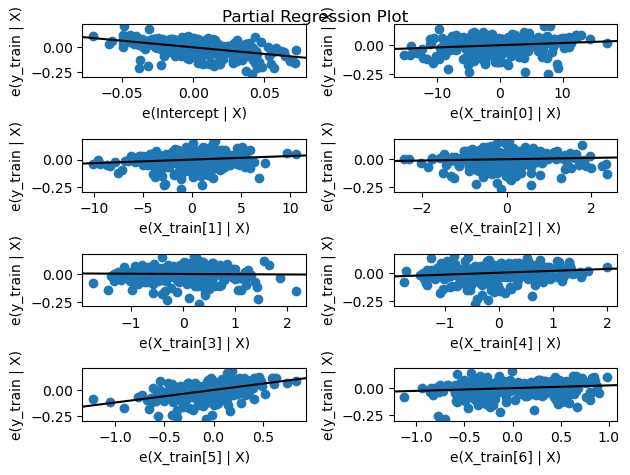

In [156]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

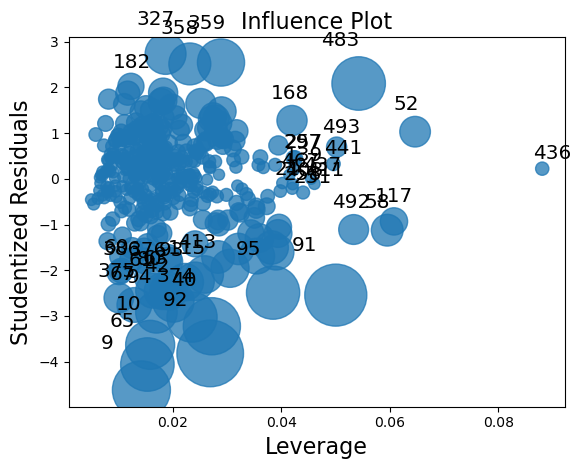

In [157]:
import statsmodels.api as sm

sm.graphics.influence_plot(model1)
plt.show()

In [158]:
import statsmodels.api as sm
import pandas as pd

# Assuming `df` is your DataFrame
# Separate features and target
X = df.drop(columns=['Chance_of_Admit'])  
y = df['Chance_of_Admit']

# Add constant for intercept in statsmodels
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Influence measures
influence = model.get_influence()

# Summary table of influence
summary = influence.summary_frame()

# Extract influential records based on leverage or Cook's distance
# Leverage threshold: 2*(number of features + 1) / number of observations
threshold_leverage = 2 * (X.shape[1]) / X.shape[0]
influential_points = summary[
    (summary['hat_diag'] > threshold_leverage) | (summary['cooks_d'] > 4 / X.shape[0])
]

print("Influential Records:")
print(influential_points.index.tolist())


Influential Records:
[9, 10, 21, 39, 40, 41, 42, 52, 56, 58, 59, 61, 63, 64, 65, 66, 67, 68, 75, 80, 91, 92, 93, 94, 95, 103, 110, 115, 116, 117, 122, 125, 139, 141, 168, 251, 257, 258, 297, 327, 358, 359, 374, 408, 411, 413, 436, 437, 441, 465, 467, 483, 492, 493]


In [159]:
# drop the influential records

X = df.drop(index = [9, 10, 21, 39, 40, 41, 42, 52, 56, 58, 59, 61, 63, 64, 65, 66, 67, 
                      68, 75, 80, 91, 92, 93, 94, 95, 103, 110, 115, 116, 117, 122, 125, 
                      139, 141, 168, 251, 257, 258, 297, 327, 358, 359, 374, 408, 411,
                      413, 436, 437, 441, 465, 467, 483, 492, 493], inplace = True)
X = df.drop(columns = ['Chance_of_Admit'])
y = df['Chance_of_Admit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("intercept : ", model.intercept_)
print("coefficient : ", model.coef_)
print("=========================================================")

ypred_train = model.predict(X_train)
print("Train R2 : ", r2_score(y_train, ypred_train))
print("cross_val_score : ", cross_val_score(model, X_train, y_train, cv = 5).mean())

ypred_test = model.predict(X_test)
print("Test R2 : ", r2_score(y_test, ypred_test))


intercept :  -1.1245275661157268
coefficient :  [0.00162856 0.00248604 0.00801483 0.00661518 0.01396031 0.11241919
 0.0234187 ]
Train R2 :  0.8934755287160541
cross_val_score :  0.8845346226116891
Test R2 :  0.889517890323642


In [160]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df, train_size = 0.8, random_state = 10)

import statsmodels.formula.api as smf
model2 = smf.ols("y_train ~ X_train", data = df_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     417.0
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          5.56e-165
Time:                        22:22:23   Log-Likelihood:                 612.04
No. Observations:                 356   AIC:                            -1208.
Df Residuals:                     348   BIC:                            -1177.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1245      0.098    -11.436      0.000      -1.318      -0.931
X_train[0]     0.0016      0.000      3.524      0.000       0.001       0.003
X_train[1]     0.0025      0.001      2.996      0.003       0.001       0.004
X_train[2]     0.0080      0.004      2.237      0.026       0.001       0.015
X_train[3]     0.0066      0.004      1.548      0.123      -0.002       0.015
X_train[4]     0.0140      0.004      3.698      0.000       0.007       0.021
X_train[5]     0.1124      0.010     11.650      0.000       0.093       0.131
X_train[6]     0.0234      0.006      3.894      0.000       0.012       0.035
==============================================================================
Omnibus:                       26.887   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.383
Skew:                          -0.607   Prob(JB):                     5.64e-08
Kurtosis:                       3.880   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Given the p-value of 0.123, it indicates that SOP (Statement of Purpose) is not statistically significant in the model, i tried to remove influence record it still not decreasing si I am deleting X_train[3]

In [161]:
# Dropping the column corresponding to X_train[3] (which has a high p-value)
df = df_train.drop(columns=["SOP"])

X = df.drop(columns = ['Chance_of_Admit'])
y = df['Chance_of_Admit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("intercept : ", model.intercept_)
print("coefficient : ", model.coef_)
print("=========================================================")

ypred_train = model.predict(X_train)
print("Train R2 : ", r2_score(y_train, ypred_train))
print("cross_val_score : ", cross_val_score(model, X_train, y_train, cv = 5).mean())

ypred_test = model.predict(X_test)
print("Test R2 : ", r2_score(y_test, ypred_test))


intercept :  -1.149581776984886
coefficient :  [0.00153635 0.00259972 0.00887772 0.0165841  0.11844866 0.02415648]
Train R2 :  0.891548488724523
cross_val_score :  0.8803979331988838
Test R2 :  0.8963974049946443


In [162]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df, train_size = 0.8, random_state = 10)

import statsmodels.formula.api as smf
model2 = smf.ols("y_train ~ X_train", data = df_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     379.5
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          1.87e-130
Time:                        22:22:23   Log-Likelihood:                 483.37
No. Observations:                 284   AIC:                            -952.7
Df Residuals:                     277   BIC:                            -927.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1496      0.111    -10.350      0.000      -1.368      -0.931
X_train[0]     0.0015      0.001      2.947      0.003       0.001       0.003
X_train[1]     0.0026      0.001      2.790      0.006       0.001       0.004
X_train[2]     0.0089      0.004      2.340      0.020       0.001       0.016
X_train[3]     0.0166      0.004      4.054      0.000       0.009       0.025
X_train[4]     0.1184      0.011     10.770      0.000       0.097       0.140
X_train[5]     0.0242      0.007      3.486      0.001       0.011       0.038
==============================================================================
Omnibus:                       17.300   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.768
Skew:                          -0.534   Prob(JB):                     5.10e-05
Kurtosis:                       3.729   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

# Final model including ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit'

]**Train R²: 0.8915**

- This indicates that approximately 89.15% of the variance in the training data is explained by the model. This is a good fit for the training set.

**Cross-Validation Score (CV): 0.8804**

- The cross-validation score is around 88.04%, which is similar to the training R². This suggests that the model is generalizing well and not overfitting, as there is little difference between training and cross-validation scores.

**Test R²: 0.8964**

- The R² on the test set is 89.64%, which is slightly better than the training R² and cross-validation score. This indicates that the model performs well on unseen data and isn't overfitting.

**Overall Observation:**

- Good Model Fit: The R² values on the training, cross-validation, and test sets are all high, suggesting a strong model with good predictive power.
- Consistency: The similar R² values across the training and test sets suggest that the model is not overfitting to the training data.
- Generalization: The model generalizes well to unseen data, as seen from the consistent performance on the test data and the cross-validation score.

# save the model

**Joblib**

In [164]:
from joblib import dump

dump(model, 'Admission_prediction.joblib')    # dump(modelname, "neme to saved")

['Admission_prediction.joblib']

**Pickle**

In [165]:
from pickle import dump

dump(model, open('Admission_prediction.pkl', 'wb'))    # wb :  writing mode